In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('airline-passenger-traffic.csv')
data.columns = ['Month','Passengers']

In [3]:
data.head()

,Month,Passengers
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       143 non-null    object 
 1   Passengers  139 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [5]:
data['Month'] = pd.to_datetime(data['Month'],format='%Y-%m')
data = data.set_index('Month')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 1949-02-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  139 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [7]:
data.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


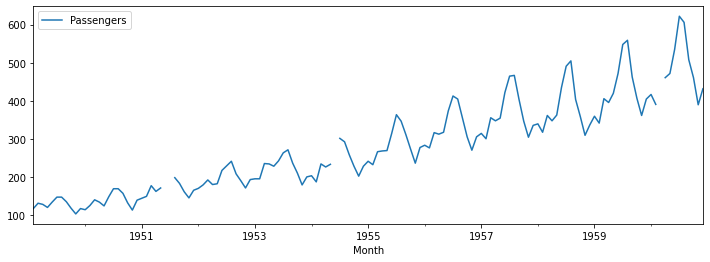

In [8]:
data.plot(figsize=[12,4])
plt.legend(loc='best')
plt.show()

In [9]:
data_1 = pd.read_csv('Metrail+dataset.csv')

In [10]:
data_1.head()

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [11]:
data_12 = data_1.ffill(axis=0)

In [12]:
data_12['Travellers(\'000)'].mean()

1838.685534591195

In [14]:
data_13 = data_1.bfill(axis=0)

In [15]:
data_13['Travellers(\'000)'].mean()

1834.446540880503

In [17]:
data_13['Travellers'] = data_1['Travellers(\'000)'].interpolate(method='linear')

In [18]:
data_13.head(6)

,Month,Travellers('000),Travellers
0,Jan-91,1724.0,1724.0
1,Feb-91,1638.0,1638.0
2,Mar-91,1987.0,1987.0
3,Apr-91,1825.0,1825.0
4,May-91,1879.0,1852.0
5,Jun-91,1879.0,1879.0


In [19]:
data_13['Travellers'].mean()

1836.566037735849

In [20]:
data.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


In [22]:
import seaborn as sns

<AxesSubplot:xlabel='Passengers'>

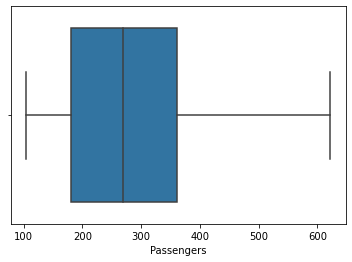

In [23]:
sns.boxplot(data.Passengers, w)

In [30]:
data['Passengers'] = data.Passengers.interpolate(method='linear')

In [31]:
data.isnull().sum()

Passengers    0
dtype: int64

In [32]:
from pylab import rcParams
import statsmodels.api as sm 
rcParams['figure.figsize'] = 12,8

In [33]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')

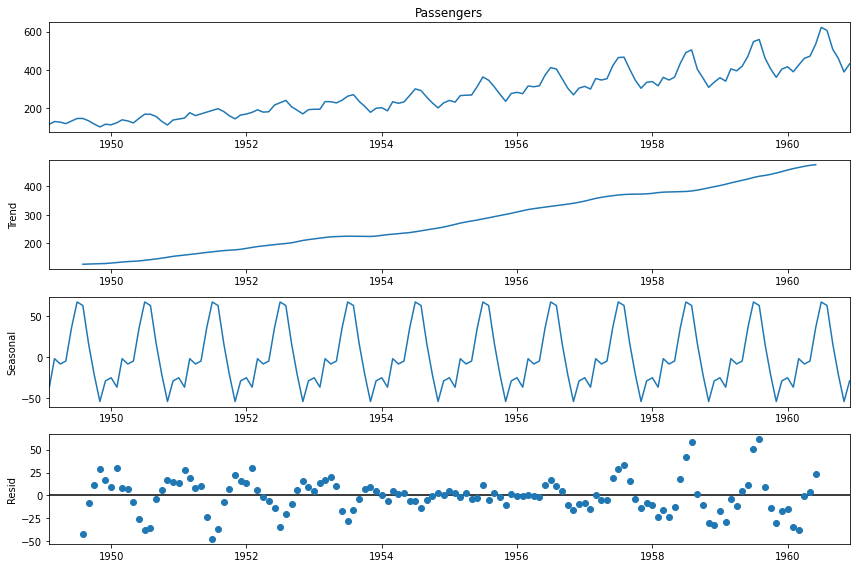

In [36]:
fig = decomposition.plot()

In [37]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')

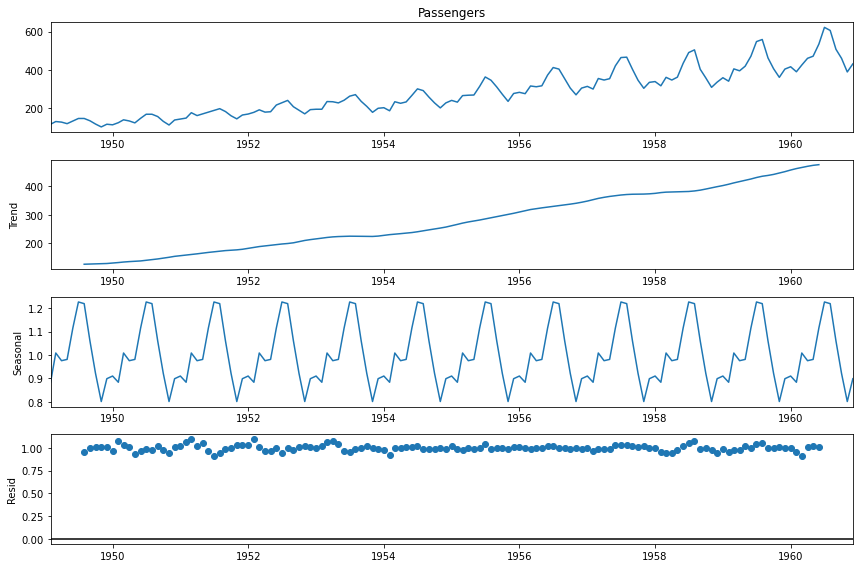

In [38]:
fig = decomposition.plot()

## Build and evaluate time series forecast

In [40]:
train_len=120
train = data[:train_len]
test = data[train_len:]

In [41]:
train.shape

(120, 1)

In [42]:
test.shape

(23, 1)

In [43]:
## Naive method

y_hat_naive = test.copy()

In [46]:
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

In [47]:
y_hat_naive.head()

,Passengers,naive_forecast
Month,,
1959-02-01,342.0,360.0
1959-03-01,406.0,360.0
1959-04-01,396.0,360.0
1959-05-01,420.0,360.0
1959-06-01,472.0,360.0


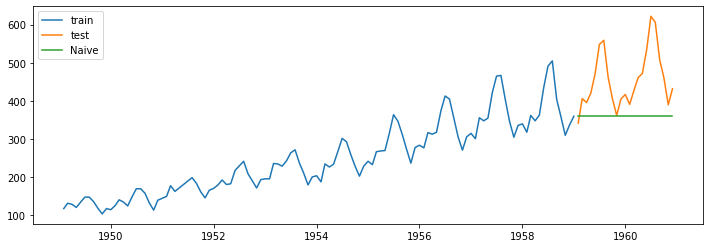

In [50]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'train')
plt.plot(test['Passengers'], label = 'test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive')
plt.legend(loc='best')
plt.show()

## Simple average Method

In [51]:
y_hat_avg = test.copy()
y_hat_avg['Avg_forecast'] = train['Passengers'].mean()

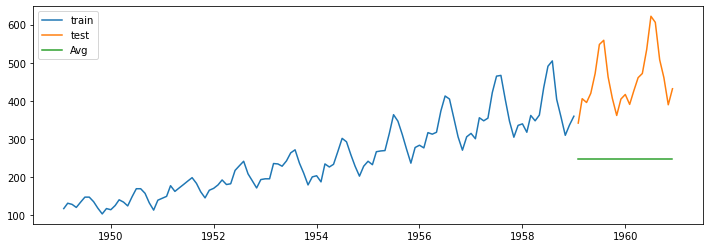

In [52]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label = 'train')
plt.plot(test['Passengers'], label = 'test')
plt.plot(y_hat_avg['Avg_forecast'], label='Avg')
plt.legend(loc='best')
plt.show()